In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#read the dataset
x=pd.read_csv(r"C:\Users\DELL\Downloads\diabetes.csv")
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#making dataset of output and storing it in y
y=x['Outcome']
x=x.drop(columns=['Outcome'])
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
#data cleaning

In [13]:
non_zero=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in non_zero:
    x[i]=x[i].replace(0,np.NaN)
    median=int(x[i].median(skipna=True))
    x[i]=x[i].replace(np.NaN,median)

In [14]:
y.shape

(768,)

In [15]:
y=y.values.reshape((768,))
x=x.values
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [16]:
#data minmaxscaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [17]:
#data normalization
u=np.mean(x,axis=0)
std=np.std(x,axis=0)
x=(x-u)/std
print(x)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [18]:
#train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x,y,test_size=0.2,random_state=526)
print(ytest.shape)
print(ytrain.shape)

(154,)
(614,)


In [19]:
#train test split
split=int(0.8*x.shape[0])
xtrain=x[:split,:]
ytrain=y[:split].reshape((-1,))
x_test=x[split:,:]
y_test=y[split:].reshape((-1,))
x_test.shape

(154, 8)

In [30]:
#KNN ALGORITHM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



neighbor = KNeighborsClassifier(n_neighbors=15)
neighbor.fit(xtrain, ytrain)
y_pred=neighbor.predict(xtest)
## Evaluating the model
neighbor= neighbor.score(xtest,ytest)



print('accuracy=',accuracy_score(ytest, y_pred))
confusion=confusion_matrix(ytest, y_pred)
accuracy=((confusion[0][0]+confusion[1][1])/(np.sum(confusion)))*100
print('accuracy=',accuracy)
f1=f1_score(ytest, y_pred)
print('f1_score=',f1)
print('precision=',precision_score(ytest, y_pred))
print('recall=',recall_score(ytest, y_pred))
print(confusion)

accuracy= 0.7402597402597403
accuracy= 74.02597402597402
f1_score= 0.574468085106383
precision= 0.6136363636363636
recall= 0.54
[[87 17]
 [23 27]]


In [35]:
# Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(xtrain,ytrain);
## Evaluating the model
log_reg = log_reg.score(xtest,ytest)
print(log_reg)

0.7532467532467533


In [37]:
## Build an model (Random forest classifier)
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(xtrain,ytrain);
## Evaluating the model
clf = clf.score(xtest,ytest)
print(clf)

0.9090909090909091


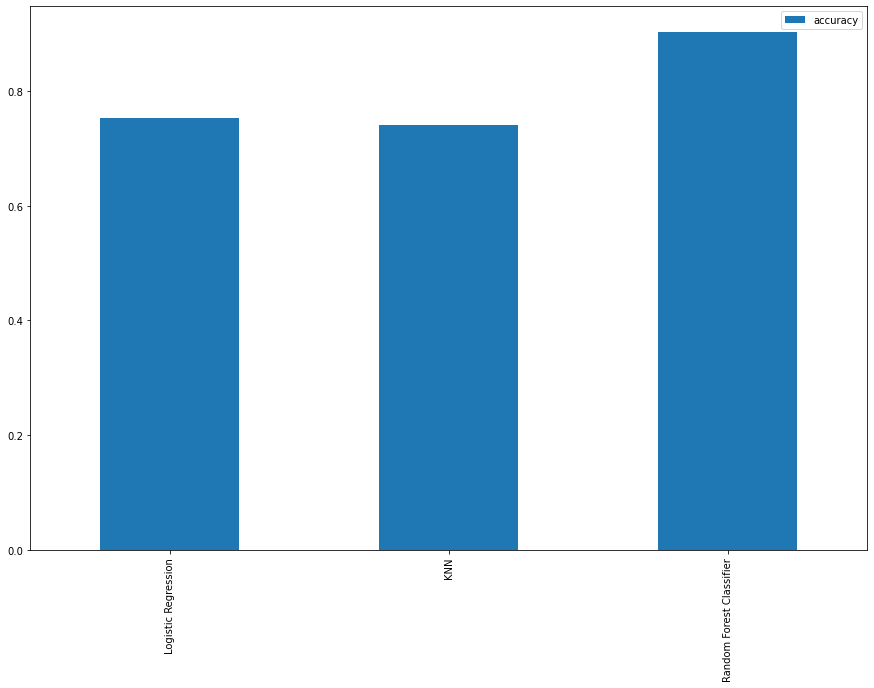

In [34]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
"KNN":neighbor,
"Random Forest Classifier":clf,},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10));